# Graphs in Python with NetworkX - code along
## Introduction

In this code along styled lab, we shall get an introduction to the popular graph library in Python, known as `NetworkX`. We shall see how to implement a basic graph while defining its edges, nodes and corresponding weights. We shall also look at visualizing a graph in Python. 

## Objectives
You will be able to:
* Understand how to draw basic graphs in networkx
* Use different ways to add nodes and edges to a graph
* Set node and edge attributes and access the network information from the stored dictionary structure
* Visualize a networkx graph with customizations using matplotlib

**Note: It is imperative that you consult the the [`networkx` documentation](https://networkx.github.io/documentation/networkx-1.10/index.html) while going through this and upcoming lessons to experiment with graph methods, customizations, algorithms etc. ** 



<img src="networkX.png" width=400>

NetworkX is a  high-productivity software for complex networks analysis. NetworkX offers data structures for representing various types of networks for connected entities including directed, undirected and multi graphs. We shall see how to build these in this section of the course.




NetworkX offers a high level of flexibility in terms of how nodes and edges are defined and what kind of data can be used to represent these entities. e.g. nodes can be hashed "term" entities in case of NLP and edges may contain any type of associations between these terms. Hence we can represent complex data structures using structured as well as unstructured data types. 

NetworkX also comes packaged with a lot of network algorithms for detailed network analysis. A detailed ist of these algorithms can be viewed [here](https://networkx.github.io/documentation/stable/reference/algorithms/index.html).  FInally, NetworkX also allows easy visualization of the the graphs that we create, using matplotlib functionality. NetworkX is multi-platform and hence a visualization tool of choice for most data science experiments in python, as well as other platforms. It is possible to draw small graphs with NetworkX. You can export network data and draw with other programs (GraphViz, Gephi, etc.). Following graphs generated from NetworkX give you an idea about types of visualizations you can develop using this tool 
<img src="example.png" width=900>


## When to use NetworkX
Unlike many other tools, NetworkX is designed to handle data on a scale relevant to common modern problems. 
Most of the core algorithms rely on extremely fast legacy code highly flexible graph implementations. So as mentioned above, a node/edge can be any data types. 

However, Large-scale problems may require faster approaches (i.e. massive networks based on Big Data with mipllions of nodes and billions of edges). Solutions like GraphX on the spark platform make better use of memory/processors in a distributed environment than Python (large objects, parallel computation). It is hence recommended that for large amounts of data (that qualifies as "Big Data") , a suitable tool should be used. 

Anyway, for this section, we can start off with NetworkX and look at the sort of problems that network analysis can solve for us. 

## Import NetworkX

We shall first pip install networkX and import it into our working environment, the usual Python way. 


```python
# Install NetworkX if not currently installed
!pip install networkx

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
```

In [1]:
import networkx as nx
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

## Creating a new Graph 

Graph is just a collection of nodes (vertices) with edges (links) etc. Below is how you create a graph in networkx. First we shall create an instance of graph as shown below:
```python
# Create an empty graph object with no nodes and edges.
G = nx.Graph() 
```

In [2]:
G = nx.Graph()

## Adding nodes

Adding node and nodes using `add_node` and `add_nodes_from` methods. As mentioned earlier, in NetworkX, nodes can be any hashable object e.g. a text string, an image. We can also define a node as an XML object with key value pairs. A node can also be another graph. Below is how you would add a node to the graph we created earlier. 
```python

# Add a few nodes to the network above using different data types
G.add_node(1)
G.add_node('one')
G.add_node(3)
G.add_node('second')

import math
G.add_node(math.cos)
```

In [3]:
G.add_node(1)
G.add_node('one')
G.add_node(3)
G.add_node('second')

import math
G.add_node(math.cos)

## Viewing nodes

Nodes can be easily viewed using `graph.nodes()` method. 
```python
# View network nodes
G.nodes()
```

In [4]:
G.nodes()

NodeView((1, 'one', 3, 'second', <built-in function cos>))

A node can be any hashable object such as a string, a function, a file and more.

Remember: unhashable objects like lists and dictionaries cannot be be added as nodes and will throw an error. Try this below:

```python
# These will throw an error
G.add_node({'dictionary': 'will throw error'})
# OR
G.add_node([1, 2])
```

In [5]:
G.add_node({'dict': 'will throw an error'})
G.add_node([1, 2])

TypeError: unhashable type: 'dict'

We can add elements from a list by using a different method. Let's add some more nodes nodes using `add_nodes_from`. 

```python
# Add nodes from list
list_of_nodes = [2, 3, 'node4']
G.add_nodes_from(list_of_nodes)
G.nodes()
```

In [6]:
list_of_nodes = [2, 3, 'node4']
G.add_nodes_from(list_of_nodes)
G.nodes()

NodeView((1, 'one', 3, 'second', <built-in function cos>, 2, 'node4'))

## `path_graph()`
NetworkX has a lot of graph generators. [`path_graph` is one of them](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.generators.classic.path_graph.html), which creates interconnected nodes. 

```python
H = nx.path_graph(7)
print(H.nodes())
```

In [7]:
H = nx.path_graph(7)
print(H.nodes())

[0, 1, 2, 3, 4, 5, 6]


In networkx, several methods return iterators as seen above. We can add the nodes from `H` we created above using `add_nodes_from` method. 

```python
# Add nodes from a path graph
G.add_nodes_from(H)
print(G.nodes())
```

In [8]:
G.add_nodes_from(H)
print(G.nodes())

[1, 'one', 3, 'second', <built-in function cos>, 2, 'node4', 0, 4, 5, 6]


## Adding Edges

Okie so let's talk about adding edges to random nodes we have created above. An edge between nodes show some sort of property or relationship that connects the nodes together. Edges are added using `add_edge()` method with node specification as shown below:

```python
# Add edges to graph nodes
G.add_edge(0, 'second')
G.add_edge(2, 3)
G.add_edge('second', 'node4')
G.add_edge(0, 'node4')
```

In [9]:
G.add_edge(0, 'second')
G.add_edge(2, 3)
G.add_edge('second', 'node4')
G.add_edge(0, 'node4')

We can also use `add_edges_from()` method to add a list of edges given in an iterable like a list of tuples describing nodes to be connected through edges. This is how you would do it. 

```python
# Add edges from a list
list_of_edges = [(2, 3), (4, 5), ('node4', 2)]
G.add_edges_from(list_of_edges)

```

In [10]:
list_of_edges = [(2,3), (4,5), ('node4',2)]
G.add_edges_from(list_of_edges)

## Viewing Edges

Similar to viewing nodes, edges can be viewed using `graph.edges()` method.

```python
# View edges
print(G.edges())
```

In [11]:
print(G.edges())

[(3, 2), ('second', 0), ('second', 'node4'), (2, 'node4'), ('node4', 0), (4, 5)]


## Inspecting number of Edges and Nodes

At any stage during the graph development, we can check the total number of nodes and edges in the graph using one of the following criteria. 

```python
# Inspect number of nodes 
print(G.number_of_nodes(), len(G), len(G.nodes()))

# Inspect number of edges
print(G.number_of_edges(), len(G.edges()))
```

In [12]:
print(G.number_of_nodes(), len(G), len(G.nodes()))

print(G.number_of_edges(), len(G.edges()))

11 11 11
6 6


## Visualizing the graph 

A simple graph can be visualized using `networkx.draw(graph)` method. Let's try to visualize the graph we have created above with nodes and edges. 

```python
# Visualize the network
nx.draw(G)
```

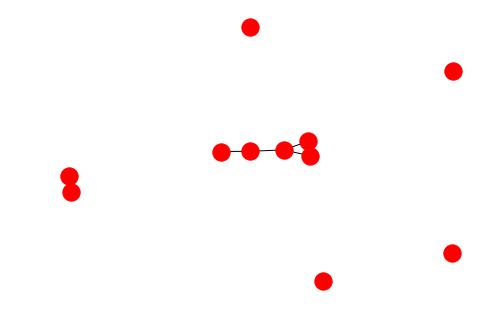

In [13]:
nx.draw(G)

We can show the default names for the nodes as labels by passing `with_labels = True` argument to the draw method. 

```python
# Visualize the network with labels 
nx.draw(G, with_labels = True )
```

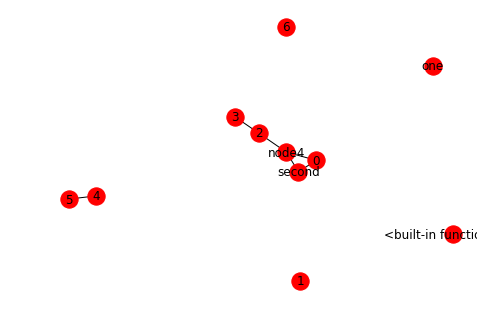

In [14]:
nx.draw(G, with_labels=True)

## Removing nodes and edges

Nodes and edges, already added to the graph can be removed using the `remove_node` and `remove_edge` methods as shown below. 

```python
# Remove node from a network 
print(G.nodes())
G.remove_node(0)
print(G.nodes())
```

In [15]:
print(G.nodes())
G.remove_node(0)
print(G.nodes())

[1, 'one', 3, 'second', <built-in function cos>, 2, 'node4', 0, 4, 5, 6]
[1, 'one', 3, 'second', <built-in function cos>, 2, 'node4', 4, 5, 6]


```python
# Remove edge from a network 
print(G.edges())
G.remove_edge('second', 'node4')
print(G.edges())
```

In [16]:
print(G.edges())
G.remove_edge('second', 'node4')
print(G.edges())

[(3, 2), ('second', 'node4'), (2, 'node4'), (4, 5)]
[(3, 2), (2, 'node4'), (4, 5)]


## Clearing the Network 

A graph can be reset/cleared at any stage using the `graph.clear()` method. 

```python
# Clear a network 
G.clear()
print(G.nodes(), G.edges())
```

In [17]:
G.clear()
print(G.nodes(), G.edges())

[] []


## Quick recap 

Below is another example of creating a graph and manipulating its components, just to summarize what we have seen above. Look at how we can use `graph.degree` to calculate the number of nodes connected to each node. 

[0, 1, 2, 3, 4, 'spam', 's', 'p', 'a', 'm']
number of edges in the graph: 4
edges in the graph: [(0, 1), (1, 2), (2, 3), (3, 4)]
degree counts per node: [(0, 1), (1, 2), (2, 2), (3, 2), (4, 1), ('spam', 0), ('s', 0), ('p', 0), ('a', 0), ('m', 0)]
degree counts for node 2: 2


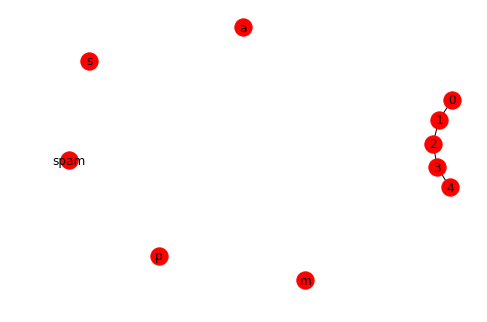

In [19]:
# Code here 

## Erdos-Reyni Graph Generator


Let's look at a simple graph generator available in networkX called `networkx.erdos_renyi_graph()`. [Here is a bit of background on this algorithm](https://www.geeksforgeeks.org/erdos-renyl-model-generating-random-graphs/). 

The generated network is an undirected network. It start with all isolated nodes (no edges) and add edges between
pairs of nodes one at a time randomly. It is perhaps the simplest (dumbest) possible network model and is very unlikely that real networks actually form like this (certainly not social networks). However, can predict a surprising number of interesting properties. There are two possible choices for adding edges randomly:
- Randomize edge presence or absence
- Randomize node pairs

The generator uses two parameters: 
- Number of nodes: n
- Probability that an edge is present: p

For each of the n(n−1)/2 possible edges in the network, imagine flipping a (biased) coin that comes up “heads” with probability p
- If coin flip is “heads”, then add the edge to the network
- If coin flip is “tails”, then don’t add the edge to the network

The generator creates a binomial graph,  known as the **“G(n, p) model”** (graph on n nodes with probability p). Here is the link for the [official documentation](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html).

```python
# Erdos-Reyni Graph Generator
G = nx.erdos_renyi_graph(10, 0.5, seed=1)

# Let's checkout nodes and edges
print(G.nodes())
print(G.edges())
nx.draw(G, with_labels=True)
```

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[(0, 1), (0, 4), (0, 5), (0, 6), (0, 9), (1, 2), (1, 4), (1, 6), (1, 7), (1, 9), (2, 5), (2, 6), (2, 9), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6), (6, 7), (7, 8), (7, 9)]


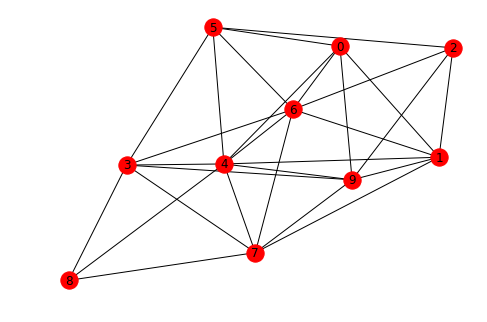

In [18]:
G = nx.erdos_renyi_graph(10, 0.5, seed=1)

print(G.nodes())
print(G.edges())
nx.draw(G, with_labels=True)

## Adding Node attributes

Every node and edge is associated with a dictionary from attribute keys to values. We can add node attributes as optional arguments along with most add methods in networkx as shown here. Let's change our graph from above and give it a "name" attribute. We can save some string values in to this attribute and visualize the network based on its name. 

```python
G.node[0]['name'] = 'pizza'
G.node[1]['name'] = 'mac and cheese'
G.node[2]['name'] = 'balogna sandwich'
G.node[3]['name'] = 'pizza'
G.node[4]['name'] = 'bananas'
G.node[5]['name'] = 'ice crem'
G.node[6]['name'] = 'currys'
G.node[7]['name'] = 'sushi'
G.node[8]['name'] = 'egg sandwich'
G.node[9]['name'] = 'apples'
nx.get_node_attributes(G,'name')
nx.draw(G,labels=nx.get_node_attributes(G,'name'),node_size=5000)
```

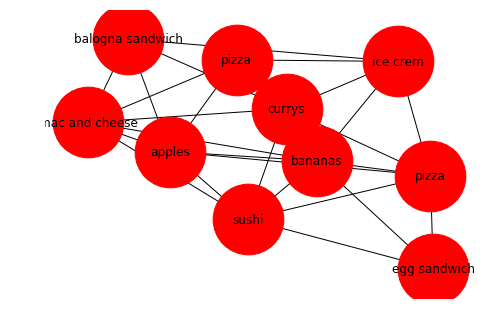

In [19]:
G.node[0]['name'] = 'pizza'
G.node[1]['name'] = 'mac and cheese'
G.node[2]['name'] = 'balogna sandwich'
G.node[3]['name'] = 'pizza'
G.node[4]['name'] = 'bananas'
G.node[5]['name'] = 'ice crem'
G.node[6]['name'] = 'currys'
G.node[7]['name'] = 'sushi'
G.node[8]['name'] = 'egg sandwich'
G.node[9]['name'] = 'apples'

nx.get_node_attributes(G, 'name')
nx.draw(G, labels=nx.get_node_attributes(G, 'name'), node_size=5000)

We can also use lists to ease the process of adding new attributes to a graph as shown below:
    
```python
# Add attributes to graph from a list 
prices = [3,5,2,7,5,6,2,4,9,12]
for i in range(10):
    G.node[i]['price'] = prices[i]
print(G.nodes('name'))
print(G.nodes('price'))
```

In [21]:
prices = [3,5,2,7,5,6,2,4,9,12]

for i in range(10):
    G.node[i]['price'] = prices[i]

print(G.nodes('name'))
print(G.nodes('price'))

[(0, 'pizza'), (1, 'mac and cheese'), (2, 'balogna sandwich'), (3, 'pizza'), (4, 'bananas'), (5, 'ice crem'), (6, 'currys'), (7, 'sushi'), (8, 'egg sandwich'), (9, 'apples')]
[(0, 3), (1, 5), (2, 2), (3, 7), (4, 5), (5, 6), (6, 2), (7, 4), (8, 9), (9, 12)]


## Adding Edge Attributes

Similar to above, we can add attributes to edges. `weight` can be used a speacial edge attribute which can be used to highlight the strength of relationship between two nodes. Let's see how we do this using `add_edge()` and `add_edge_from()` methods. 



```python
# Add edge Attributes
G.add_edge(1, 5, weight=4.7)
G[1][2]['weight'] = 5.6

print(G[1][5]['weight'])
print(G[1][2]['weight'])
```

In [22]:
G.add_edge(1, 5, weight=4.7)

G[1][2]['weight'] = 5.6

print(G[1][5]['weight'])
print(G[1][2]['weight'])

4.7
5.6


```python
# Add edge from method

G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
print(G[2][3]['weight'])
print(G[3][4]['color'])
print(G[4][5]['color'])
print(G[1][2]['color'])
print(G[1][2]) # All edge attributes
```

In [23]:
G.add_edges_from([(3,4), (4,5)], color='red')
G.add_edges_from([(1,2, {'color':'blue'}), 
                 (2,3, {'weight': 8})])

print(G[2][3]['weight'])
print(G[3][4]['color'])
print(G[4][5]['color'])
print(G[1][2]['color'])
print(G[1][2]) 

8
red
red
blue
{'weight': 5.6, 'color': 'blue'}


## Drawing with Customizations

We can selectively visualize the node and edge attributes using `draw_networkx_labels` and `draw_networkx_edge_labels`. The `pos` argument passed to `nx.draw()`  with a [layout](https://networkx.github.io/documentation/networkx-1.10/reference/drawing.html?highlight=layout#module-networkx.drawing.layout) to describe how nodes and edges might be formatted. 

```python
# Visulize the graph with selective options
pos = nx.spring_layout(G)

nx.draw(G, pos, node_size=1000, font_size=30, node_color='salmon')

node_labels = nx.get_node_attributes(G,'name')
nx.draw_networkx_labels(G, pos, labels = node_labels)

edge_labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_labels)
# plt.savefig('this.png')
plt.show()
```

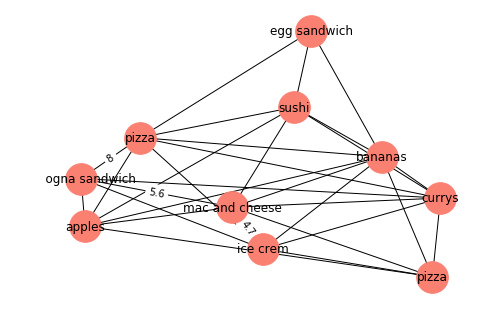

In [24]:
pos = nx.spring_layout(G)

nx.draw(G, pos, node_size=1000, font_size=30, node_color='salmon')

node_labels = nx.get_node_attributes(G, 'name')
nx.draw_networkx_labels(G, pos, labels=node_labels)

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()

## Summary 

In this code along, we looked at some basic graph definitions in networkx. We looked at number of different ways to add nodes and edges to a graph. We also looked at setting up different attributes for nodes and edges and visualizing the graph with customized options. We can now move on to seeing how we can apply different analytical techniques to our graphs. 